# Baseline Model: Logistic Regression

This notebook implements a baseline logistic regression model for churn prediction.

**Purpose**: Establish a baseline performance benchmark before trying more complex models.

**Expected Performance**: ROC-AUC 0.65-0.72

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix,
                             classification_report, roc_curve)
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries imported')

✓ Libraries imported


## 1. Load Prepared Data

In [2]:
# Load training and validation sets
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
X_val = pd.read_csv('../data/processed/X_val.csv')
y_val = pd.read_csv('../data/processed/y_val.csv').values.ravel()

print(f'Training set: {X_train.shape}')
print(f'Validation set: {X_val.shape}')
print(f'Features: {X_train.shape[1]}')
print(f'\nChurn rate in training: {y_train.mean()*100:.2f}%')
print(f'Churn rate in validation: {y_val.mean()*100:.2f}%')

Training set: (2249, 39)
Validation set: (482, 39)
Features: 39

Churn rate in training: 42.20%
Churn rate in validation: 42.32%


## 2. Train Baseline Model

In [3]:
# Initialize Logistic Regression
print('Training Logistic Regression...')

baseline_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    C=1.0,
    solver='lbfgs'
)

# Train
baseline_model.fit(X_train, y_train)

print('✓ Model trained successfully')

Training Logistic Regression...
✓ Model trained successfully


## 3. Make Predictions

In [4]:
# Predictions on training set
y_train_pred = baseline_model.predict(X_train)
y_train_proba = baseline_model.predict_proba(X_train)[:, 1]

# Predictions on validation set
y_val_pred = baseline_model.predict(X_val)
y_val_proba = baseline_model.predict_proba(X_val)[:, 1]

print('✓ Predictions generated')

✓ Predictions generated


## 4. Evaluate Performance

In [5]:
# Calculate metrics
train_metrics = {
    'roc_auc': roc_auc_score(y_train, y_train_proba),
    'accuracy': accuracy_score(y_train, y_train_pred),
    'precision': precision_score(y_train, y_train_pred),
    'recall': recall_score(y_train, y_train_pred),
    'f1_score': f1_score(y_train, y_train_pred)
}

val_metrics = {
    'roc_auc': roc_auc_score(y_val, y_val_proba),
    'accuracy': accuracy_score(y_val, y_val_pred),
    'precision': precision_score(y_val, y_val_pred),
    'recall': recall_score(y_val, y_val_pred),
    'f1_score': f1_score(y_val, y_val_pred)
}

# Print results
print('='*60)
print('BASELINE MODEL PERFORMANCE')
print('='*60)
print('\nTraining Set:')
for metric, value in train_metrics.items():
    print(f'  {metric.upper()}: {value:.4f}')

print('\nValidation Set:')
for metric, value in val_metrics.items():
    status = '✅' if metric == 'roc_auc' and value >= 0.65 else ''
    print(f'  {metric.upper()}: {value:.4f} {status}')

print('='*60)

BASELINE MODEL PERFORMANCE

Training Set:
  ROC_AUC: 0.7364
  ACCURACY: 0.6598
  PRECISION: 0.5749
  RECALL: 0.7439
  F1_SCORE: 0.6486

Validation Set:
  ROC_AUC: 0.7126 ✅
  ACCURACY: 0.6432 
  PRECISION: 0.5630 
  RECALL: 0.7010 
  F1_SCORE: 0.6245 


## 5. Confusion Matrix

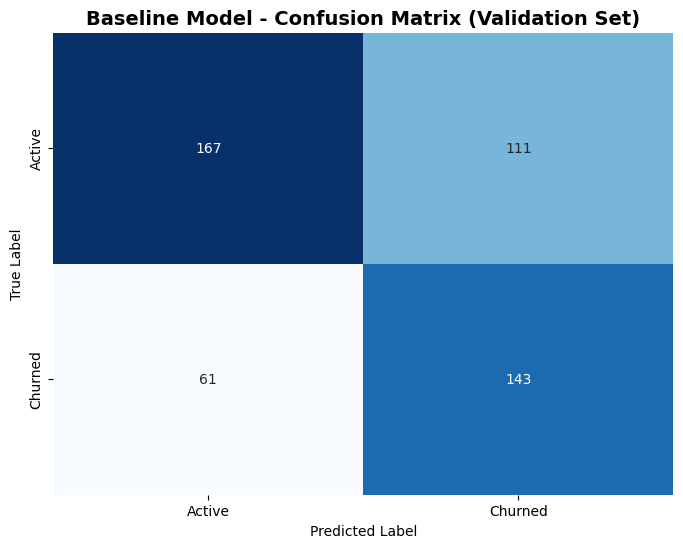

True Negatives: 167
False Positives: 111
False Negatives: 61
True Positives: 143


In [6]:
# Create confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Baseline Model - Confusion Matrix (Validation Set)', fontsize=14, weight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Active', 'Churned'])
plt.yticks([0.5, 1.5], ['Active', 'Churned'])

import os
os.makedirs('../visualizations/baseline', exist_ok=True)
plt.savefig('../visualizations/baseline/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'True Negatives: {cm[0,0]}')
print(f'False Positives: {cm[0,1]}')
print(f'False Negatives: {cm[1,0]}')
print(f'True Positives: {cm[1,1]}')

## 6. ROC Curve

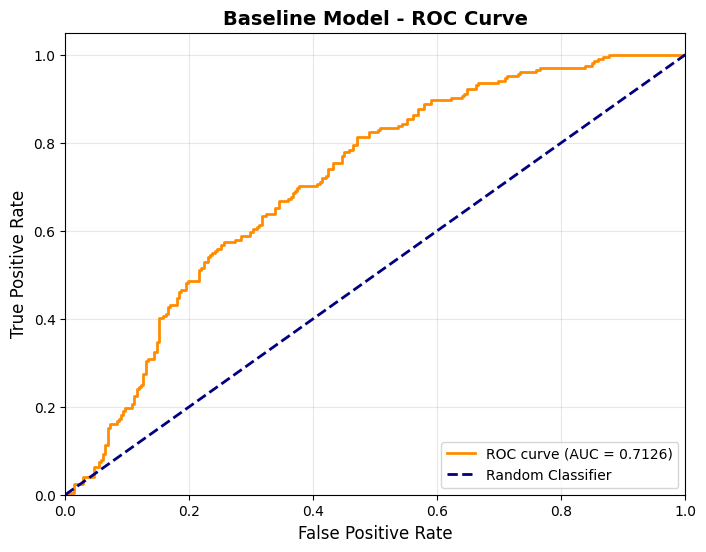

In [7]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Baseline Model - ROC Curve', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('../visualizations/baseline/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Feature Coefficients (Top 10)

Top 10 Most Important Features (by coefficient magnitude):
                  Feature  Coefficient
               TotalSpent    -1.013943
             Freq_x_Spend     0.666858
            AvgBasketSize    -0.589740
     Purchases_Last30Days    -0.384393
            MaxBasketSize     0.377751
            AvgOrderValue     0.334745
               TotalItems     0.329608
CustomerSegment_Champions    -0.311291
              Active_Freq    -0.241638
         Spend_Last30Days     0.212242


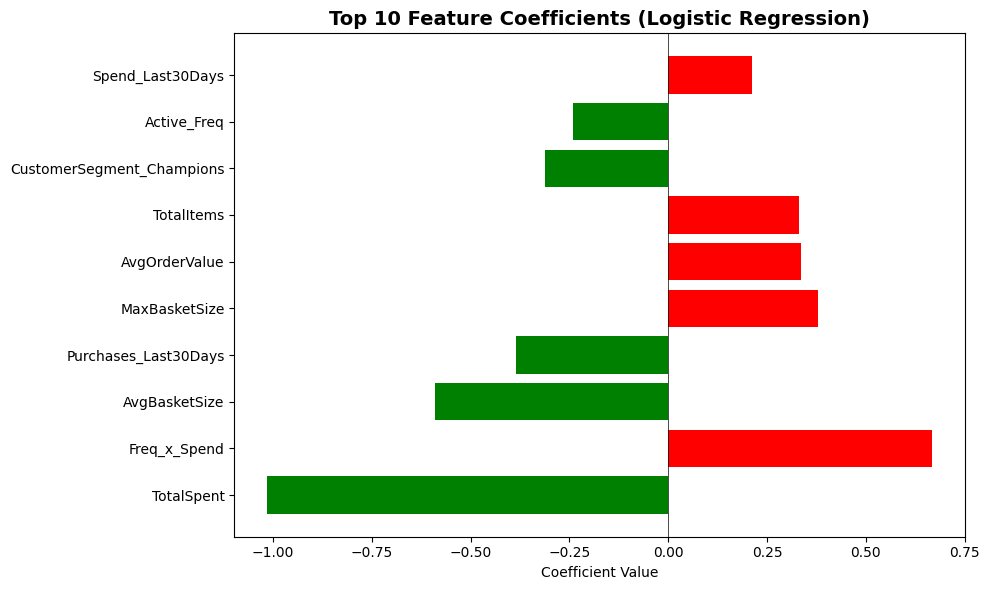

In [8]:
# Get feature names
import json
with open('../data/processed/feature_names.json', 'r') as f:
    feature_names = json.load(f)['feature_names']

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': baseline_model.coef_[0]
})

# Sort by absolute value
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

# Display top 10
print('Top 10 Most Important Features (by coefficient magnitude):')
print('='*60)
print(coefficients[['Feature', 'Coefficient']].head(10).to_string(index=False))

# Plot top 10
plt.figure(figsize=(10, 6))
top_10 = coefficients.head(10)
colors = ['red' if x > 0 else 'green' for x in top_10['Coefficient']]
plt.barh(range(10), top_10['Coefficient'], color=colors)
plt.yticks(range(10), top_10['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients (Logistic Regression)', fontsize=14, weight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('../visualizations/baseline/feature_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save Model

In [9]:
# Save model
joblib.dump(baseline_model, '../models/baseline_logistic_regression.pkl')
print('✓ Model saved to models/baseline_logistic_regression.pkl')

# Save metrics
import json
metrics_to_save = {
    'model_name': 'Logistic Regression (Baseline)',
    'training_metrics': train_metrics,
    'validation_metrics': val_metrics
}

with open('../models/baseline_metrics.json', 'w') as f:
    json.dump(metrics_to_save, f, indent=4)

print('✓ Metrics saved to models/baseline_metrics.json')

✓ Model saved to models/baseline_logistic_regression.pkl
✓ Metrics saved to models/baseline_metrics.json


## 9. Classification Report

In [10]:
print('Classification Report (Validation Set):')
print('='*60)
print(classification_report(y_val, y_val_pred, target_names=['Active', 'Churned']))
print('='*60)

Classification Report (Validation Set):
              precision    recall  f1-score   support

      Active       0.73      0.60      0.66       278
     Churned       0.56      0.70      0.62       204

    accuracy                           0.64       482
   macro avg       0.65      0.65      0.64       482
weighted avg       0.66      0.64      0.65       482



## 10. Summary & Next Steps

In [11]:
print('\n' + '='*60)
print('BASELINE MODEL SUMMARY')
print('='*60)
print(f'Model: Logistic Regression with class_weight=balanced')
print(f'Training Samples: {len(X_train)}')
print(f'Validation Samples: {len(X_val)}')
print(f'Features: {X_train.shape[1]}')
print(f'\nValidation ROC-AUC: {val_metrics["roc_auc"]:.4f}')
print(f'Validation Accuracy: {val_metrics["accuracy"]:.4f}')
print(f'Validation Precision: {val_metrics["precision"]:.4f}')
print(f'Validation Recall: {val_metrics["recall"]:.4f}')
print(f'Validation F1: {val_metrics["f1_score"]:.4f}')
print('\nTop 3 Important Features:')
for i, row in coefficients.head(3).iterrows():
    print(f'  {i+1}. {row["Feature"]} ({row["Coefficient"]:.4f})')
print('\nNext Steps:')
print('  1. Train advanced models (Decision Tree, Random Forest, Gradient Boosting)')
print('  2. Compare performance against this baseline')
print('  3. Select best model based on ROC-AUC')
print('='*60)


BASELINE MODEL SUMMARY
Model: Logistic Regression with class_weight=balanced
Training Samples: 2249
Validation Samples: 482
Features: 39

Validation ROC-AUC: 0.7126
Validation Accuracy: 0.6432
Validation Precision: 0.5630
Validation Recall: 0.7010
Validation F1: 0.6245

Top 3 Important Features:
  3. TotalSpent (-1.0139)
  23. Freq_x_Spend (0.6669)
  8. AvgBasketSize (-0.5897)

Next Steps:
  1. Train advanced models (Decision Tree, Random Forest, Gradient Boosting)
  2. Compare performance against this baseline
  3. Select best model based on ROC-AUC
